In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup 
import requests

In [2]:
pip install wikipedia

Note: you may need to restart the kernel to use updated packages.


In [3]:
import wikipedia as wp

html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

# determine the index of your table
df = pd.read_html(html, header = 0)[0]

df = df[df.Borough != 'Not assigned']
df = df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']

c=pd.read_csv('Geospatial_Coordinates.csv')
c.columns = ['Postcode', 'Latitude', 'Longitude']
df = pd.merge(c, df, on='Postcode')

In [4]:
df = df[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']]

## we will create a graph point of neighboard. To do it we will. load two libraries  : Shapely to manipulate location data as point and geopandas to transforme dataframe to location dataframe

In [7]:
import matplotlib.pyplot as plt

In [8]:
pip install Shapely

    100% |████████████████████████████████| 1.5MB 13.1MB/s 
Note: you may need to restart the kernel to use updated packages.


In [9]:
from shapely.geometry import Point 

In [11]:
pip install geopandas 

    100% |████████████████████████████████| 901kB 17.2MB/s 
    100% |████████████████████████████████| 17.9MB 2.3MB/s 
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch
Note: you may need to restart the kernel to use updated packages.


In [12]:
import geopandas as gp

/home/jupyterlab/conda/lib/python3.6/site-packages/geopandas/plotting.py:418: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


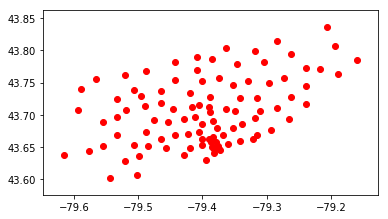

In [13]:
# load latitude and longitude into geopandas dataframe
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gp.GeoDataFrame(df, geometry='Coordinates')

# set up map
cities = gp.read_file(gp.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='white', edgecolor='black')

# plot and show
gdf.plot(ax=ax, color='red')
plt.show()